# Progetto IUM - Data Analysis
## Università di Informatica, Unito
Gruppo Federico Raso, Federico Verra

In seguito ad una analisi generale sui dati a noi forniti, abbiamo deciso di suddividere il nostro lavoro in tre sezioni, che ci avrebbero permesso di svolgere il nostro compito in modo più ordinato e sistematico possibile.
- 1 Analisi e pulizia dei dati
- 2 Il Grande Schermo Risponde


In [1]:
#import delle librerie
import pandas as pd
import geopandas as gpd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [3]:
#lettura dei file.csv originali
data_directory = "./data/"

actors_o_df = pd.read_csv(data_directory+'actors.csv')
countries_o_df = pd.read_csv(data_directory+'countries.csv')
crew_o_df = pd.read_csv(data_directory+'crew.csv')
genres_o_df = pd.read_csv(data_directory+'genres.csv')
languages_o_df = pd.read_csv(data_directory+'languages.csv')
movies_o_df = pd.read_csv(data_directory+'movies.csv')
posters_o_df = pd.read_csv(data_directory+'posters.csv')
releases_o_df = pd.read_csv(data_directory+'releases.csv')
reviews_rotten_o_df = pd.read_csv(data_directory+'rotten_tomatoes_reviews.csv')
studios_o_df = pd.read_csv(data_directory+'studios.csv')
oscar_o_df = pd.read_csv(data_directory+'the_oscar_awards.csv')

world = gpd.read_file(data_directory+'/countries/ne_110m_admin_0_countries.shp')

## 1 - Analisi e pulizia dei dati

Reviews_rotten_df

In [37]:
reviews_rotten_df = reviews_rotten_o_df.copy()
reviews_rotten_df.dtypes

rotten_tomatoes_link    object
movie_title             object
critic_name             object
top_critic                bool
publisher_name          object
review_type             object
review_score            object
review_date             object
review_content          object
dtype: object

In [38]:
reviews_rotten_df = reviews_rotten_df[['movie_title','critic_name','top_critic','publisher_name','review_type','review_score']]
reviews_rotten_df

movie_title        critic_name  \
0        Percy Jackson & the Olympians: The Lightning T...    Andrew L. Urban   
1        Percy Jackson & the Olympians: The Lightning T...      Louise Keller   
2        Percy Jackson & the Olympians: The Lightning T...                NaN   
3        Percy Jackson & the Olympians: The Lightning T...       Ben McEachen   
4        Percy Jackson & the Olympians: The Lightning T...        Ethan Alter   
...                                                    ...                ...   
1129882                                          Zulu Dawn      Chuck O'Leary   
1129883                                          Zulu Dawn          Ken Hanke   
1129884                                          Zulu Dawn    Dennis Schwartz   
1129885                                          Zulu Dawn  Christopher Lloyd   
1129886                                          Zulu Dawn     Brent McKnight   

         top_critic                   publisher_name review_type review_score  
0             False                   Urban Cinefile       Fresh          NaN  
1             False                   Urban Cinefile       Fresh          NaN  
2             False              FILMINK (Australia)       Fresh          NaN  
3             False          Sunday Mail (Australia)       Fresh        3.5/5  
4              True               Hollywood Reporter      Rotten          NaN  
...             ...                              ...         ...          ...  
1129882       False                 Fantastica Daily      Rotten          2/5  
1129883       False  Mountain Xpress (Asheville, NC)       Fresh        3.5/5  
1129884       False    Dennis Schwartz Movie Reviews       Fresh           B+  
1129885       False          Sarasota Herald-Tribune      Rotten        3.5/5  
1129886       False             The Last Thing I See      Rotten            C  

[1129887 rows x 6 columns]

In [39]:
duplicati = reviews_rotten_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

120775


In [42]:
reviews_rotten_df = reviews_rotten_df.drop_duplicates()

Actors_df

In [43]:
actors_df = actors_o_df.copy()
actors_df.dtypes

id       int64
name    object
role    object
dtype: object

In [44]:
duplicati = actors_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

946


In [45]:
actors_df.drop_duplicates(inplace=True)
actors_df.dropna(inplace=True)

Movies_df

In [4]:
movies_df = movies_o_df.copy()
movies_df.dtypes

id               int64
name            object
date           float64
tagline         object
description     object
minute         float64
rating         float64
dtype: object

In [5]:
movies_df = movies_df[['id','name','date','minute','rating']]
movies_df.rename(columns={'name':'film_name','date':'film_date'}, inplace=True)
movies_df

id                          film_name  film_date  minute  rating
0       1000001                             Barbie     2023.0   114.0    3.86
1       1000002                           Parasite     2019.0   133.0    4.56
2       1000003  Everything Everywhere All at Once     2022.0   140.0    4.30
3       1000004                         Fight Club     1999.0   139.0    4.27
4       1000005                         La La Land     2016.0   129.0    4.09
...         ...                                ...        ...     ...     ...
941592  1941593                                 神笛        NaN     NaN     NaN
941593  1941594                      蟲極道蜜団子抗争編 壱ノ巻        NaN    30.0     NaN
941594  1941595                      蟲極道蜜団子抗争編 弐ノ巻        NaN    30.0     NaN
941595  1941596                                 重生        NaN     NaN     NaN
941596  1941597                             青ひげ公の城        NaN   130.0     NaN

[941597 rows x 5 columns]

In [6]:
duplicati = movies_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


In [7]:
movies_df.dropna(axis=0,inplace=True)

Oscar_df

In [51]:
oscar_df=oscar_o_df.copy()
oscar_df.dtypes

year_film         int64
year_ceremony     int64
ceremony          int64
category         object
name             object
film             object
winner             bool
dtype: object

In [52]:
oscar_df = oscar_df[['year_film','year_ceremony','category','name','film','winner']].copy()

oscar_df['year_film'] = pd.to_datetime(oscar_df['year_film'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_film'],errors='coerce'))
oscar_df['year_ceremony'] = pd.to_datetime(oscar_df['year_ceremony'], errors='coerce', format='%Y').fillna(pd.to_datetime(oscar_df['year_ceremony'],errors='coerce'))

oscar_df.rename(columns={'year_film':'film_date','year_ceremony':'ceremony_date', 'name':'person_country','film':'film_name'}, inplace=True)

oscar_df

film_date ceremony_date                          category  \
0     1927-01-01    1928-01-01                             ACTOR   
1     1927-01-01    1928-01-01                             ACTOR   
2     1927-01-01    1928-01-01                           ACTRESS   
3     1927-01-01    1928-01-01                           ACTRESS   
4     1927-01-01    1928-01-01                           ACTRESS   
...          ...           ...                               ...   
10884 2023-01-01    2024-01-01     WRITING (Original Screenplay)   
10885 2023-01-01    2024-01-01  JEAN HERSHOLT HUMANITARIAN AWARD   
10886 2023-01-01    2024-01-01                    HONORARY AWARD   
10887 2023-01-01    2024-01-01                    HONORARY AWARD   
10888 2023-01-01    2024-01-01                    HONORARY AWARD   

                                          person_country         film_name  \
0                                    Richard Barthelmess         The Noose   
1                                          Emil Jannings  The Last Command   
2                                         Louise Dresser   A Ship Comes In   
3                                           Janet Gaynor        7th Heaven   
4                                         Gloria Swanson    Sadie Thompson   
...                                                  ...               ...   
10884                             Written by Celine Song        Past Lives   
10885                                                NaN               NaN   
10886  To Angela Bassett, who has inspired audiences ...               NaN   
10887  To Mel Brooks, for his comedic brilliance, pro...               NaN   
10888  To Carol Littleton, whose commitment to her cr...               NaN   

       winner  
0       False  
1        True  
2       False  
3        True  
4       False  
...       ...  
10884   False  
10885    True  
10886    True  
10887    True  
10888    True  

[10889 rows x 6 columns]

In [53]:
duplicati = oscar_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

7


In [54]:
oscar_df.drop_duplicates(inplace=True)

Releases_df

In [55]:
releases_df = releases_o_df.copy()
releases_df.dtypes

id          int64
country    object
date       object
type       object
rating     object
dtype: object

In [56]:
releases_df['date'] = pd.to_datetime(releases_df['date'], errors='coerce', format='%Y').fillna(pd.to_datetime(releases_df['date'],errors='coerce'))

releases_df

id    country       date        type rating
0        1000001    Andorra 2023-07-21  Theatrical    NaN
1        1000001  Argentina 2023-07-20  Theatrical    ATP
2        1000001  Australia 2023-07-19  Theatrical     PG
3        1000001  Australia 2023-10-01     Digital     PG
4        1000001    Austria 2023-07-20  Theatrical    NaN
...          ...        ...        ...         ...    ...
1332777  1940967        USA 1909-01-01  Theatrical    NaN
1332778  1940968     Sweden 1908-11-11  Theatrical    NaN
1332779  1940969     France 1902-01-01  Theatrical    NaN
1332780  1940970     France 1902-01-01  Theatrical    NaN
1332781  1940971     France 1902-01-01  Theatrical    NaN

[1332782 rows x 5 columns]

In [57]:
duplicati = releases_df.duplicated()  
numero_duplicati = duplicati.sum() 
print(numero_duplicati)

0


Countries_df

In [58]:
countries_df = countries_o_df.copy()
countries_df.dtypes

id          int64
country    object
dtype: object

In [59]:
countries_df

id      country
0       1000001           UK
1       1000001          USA
2       1000002  South Korea
3       1000003          USA
4       1000004      Germany
...         ...          ...
693471  1941593        China
693472  1941594          USA
693473  1941595          USA
693474  1941596        China
693475  1941597        Japan

[693476 rows x 2 columns]

In [60]:
countries_df['country'] = countries_df['country'].astype('string')
print(countries_df.duplicated().sum())

0


In [61]:
countries_df.dropna(axis=0, inplace=True)

Crew_df

In [62]:
crew_df = crew_o_df.copy()
crew_df.dtypes

id       int64
role    object
name    object
dtype: object

In [63]:
crew_df['role'] = crew_df['role'].astype('string')
crew_df['name'] = crew_df['name'].astype('string')
crew_df

id            role                  name
0        1000001        Director          Greta Gerwig
1        1000001        Producer          Tom Ackerley
2        1000001        Producer         Margot Robbie
3        1000001        Producer        Robbie Brenner
4        1000001        Producer          David Heyman
...          ...             ...                   ...
4720178  1941596         Casting                   线雨轩
4720179  1941596          Editor  Eric Kwong Chi-Leung
4720180  1941596  Cinematography             Kenny Tse
4720181  1941596        Composer                   胡小欧
4720182  1941596  Costume design           Kenneth Yee

[4720183 rows x 3 columns]

In [64]:
print(crew_df.duplicated().sum())

1282


In [65]:
crew_df.drop_duplicates(inplace=True)
print(crew_df.duplicated().sum())

0


Genres_df

In [5]:
genres_df = genres_o_df.copy()
genres_df.dtypes

id        int64
genre    object
dtype: object

In [6]:
genres_df['genre'] = genres_df['genre'].astype('string')
genres_df

id      genre
0        1000001     Comedy
1        1000001  Adventure
2        1000002     Comedy
3        1000002   Thriller
4        1000002      Drama
...          ...        ...
1046844  1941563      Drama
1046845  1941566      Crime
1046846  1941569      Crime
1046847  1941596     Action
1046848  1941596      Crime

[1046849 rows x 2 columns]

In [7]:
print(genres_df.duplicated().sum())

0


## 2 - Il Grande Schermo risponde

## Quale genere di film è stato più prodotto?

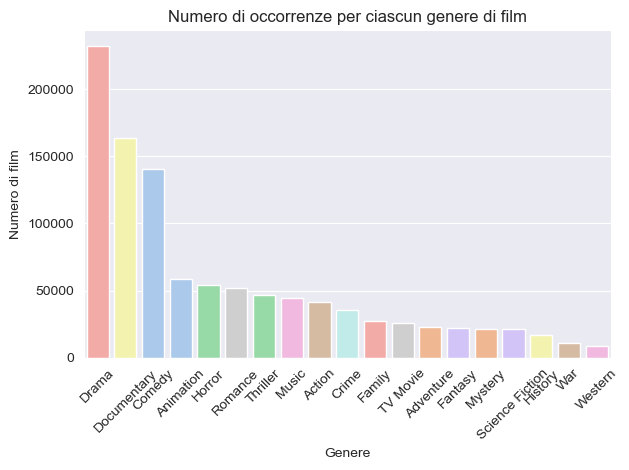

In [13]:
ax = sns.countplot( data=genres_df, x='genre', hue='genre', palette='pastel',         
    legend=False, order=genres_df['genre'].value_counts().index)

plt.title("Numero di occorrenze per ciascun genere di film")
plt.xlabel("Genere")
plt.ylabel("Numero di film")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dal grafico emerge chiaramente che il genere Drama è il più rappresentato nel dataset. Seguono Documentary e Comedy, che superano entrambi i 140.000 titoli. Al contrario, i generi War e Western risultano i meno frequenti.

La predominanza del genere Drama potrebbe indicare una maggiore propensione dell'industria cinematografica a produrre film con tematiche profonde o narrative emotive.
La presenza massiccia di Documentari potrebbe riflettere l’interesse crescente per i contenuti informativi o la maggiore accessibilità alla produzione di questo genere (anche da parte di realtà indipendenti).

### Il film “Please Give” è piaciuto più al pubblico o ai critici ?

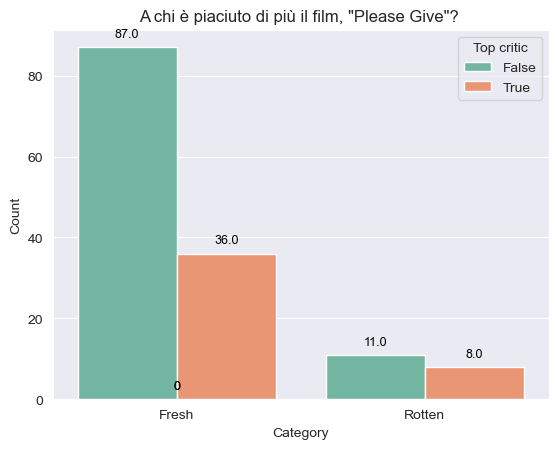

In [28]:
#Seleziono solo i record con title = "Please Give"
please_give_df = reviews_rotten_df[reviews_rotten_df['movie_title']=='Please Give'].copy()

def add_count_on_bars(ax):
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax = sns.countplot(x='review_type', hue='top_critic', data=please_give_df, palette='Set2')
plt.title('A chi è piaciuto di più il film, "Please Give"? ')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Top critic')
add_count_on_bars(ax)
plt.show()

Attraverso l’analisi delle recensioni ricevute dal film è stato possibile generare un grafico di facile lettura, che consente di valutare il grado di successo ottenuto. Dall’osservazione dei dati emerge che, sebbene non siano mancate alcune recensioni negative, la maggior parte dei giudizi è risultata positiva. Pertanto, si può ragionevolmente affermare che il film abbia riscosso un buon successo, sia presso il pubblico che tra la critica.

### Quale film della saga "Harry Potter" ha ottenuto più recensioni positive?

In [29]:
#Seleziono i record  con title = "Harry Potter" e le recensioni positive type = "fresh"
harry_potter_df = reviews_rotten_df[
    (reviews_rotten_df['movie_title'].str.match(r'^Harry Potter\b', na=False)) &
    (reviews_rotten_df['review_type'] == 'Fresh')
].copy()

#controllo i nomi univoci
nomi_univoci = harry_potter_df['movie_title'].unique()
nomi_univoci

array(['Harry Potter and the Chamber of Secrets',
       'Harry Potter and the Deathly Hallows - Part 1',
       'Harry Potter and the Deathly Hallows - Part 2',
       'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Half-Blood Prince',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Prisoner of Azkaban',
       "Harry Potter and the Sorcerer's Stone"], dtype=object)

In [30]:
from pandas import CategoricalDtype

#Rinomino i film in base alla data di uscita
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Sorcerer's Stone", '1')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Chamber of Secrets", '2')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Prisoner of Azkaban", '3')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Goblet of Fire", '4')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Order of the Phoenix", '5')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Half-Blood Prince", '6')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Deathly Hallows - Part 1", '7 Part 1')
harry_potter_df['movie_title'] = harry_potter_df['movie_title'].replace("Harry Potter and the Deathly Hallows - Part 2", '7 Part 2')

custom_order = ["1","2","3","4","5","6","7 Part 1","7 Part 2"]

cat_type = CategoricalDtype(categories=custom_order, ordered=True)

harry_potter_df['movie_title'] = harry_potter_df['movie_title'].astype(cat_type)

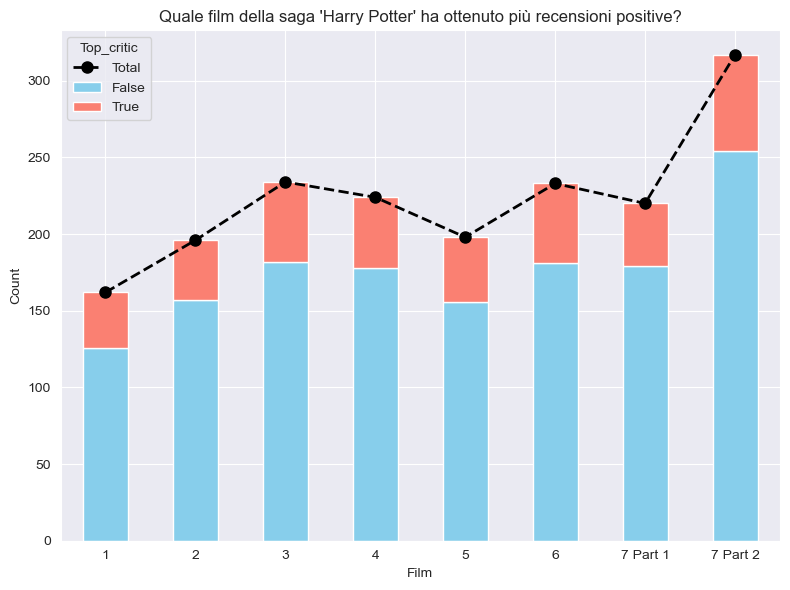

In [31]:
reviews_counts = harry_potter_df.groupby(['movie_title', 'top_critic'],observed=False)['movie_title'].count().unstack()

fig, ax = plt.subplots(figsize=(8, 6))

reviews_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)

reviews_counts.sum(axis=1).plot(marker='o', color='black', linestyle='dashed', linewidth=2, markersize=8, label='Total')

plt.title("Quale film della saga 'Harry Potter' ha ottenuto più recensioni positive?")
plt.xlabel('Film')
plt.ylabel('Count')
plt.legend(title='Top_critic', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Analizzando le recensioni positive ricevute dai film della saga di Harry Potter, si osserva che l’ultimo capitolo, Harry Potter and the Deathly Hallows – Part 2, ha ottenuto un riscontro particolarmente favorevole, risultando il più apprezzato dell’intera serie. Inoltre, sulla base del grafico consultato, è possibile rilevare un progressivo miglioramento nel corso della saga, segno di una crescita qualitativa percepita dal pubblico e/o dalla critica.

### In quanti film un attore ha recitato nella sua vita?

In [32]:
#raggruppo per ogni attore tutti i film in cui ha recitato
movies_per_actor = actors_df.groupby('name').size().reset_index(name='movies')

movies_per_actor = movies_per_actor[movies_per_actor['movies']<10]

#conto il numero di film recitati per attore
movies_number = movies_per_actor['movies'].value_counts().reset_index()
movies_number.columns = ['numero_film', 'frequenza']

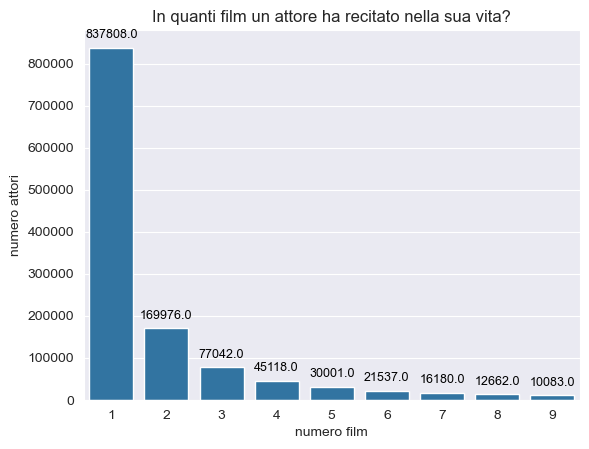

In [33]:
def add_count_on_bars(ax):
   
    for p in ax.patches:
     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

ax = sns.barplot(data=movies_number, x='numero_film', y='frequenza')

plt.title('In quanti film un attore ha recitato nella sua vita?')
plt.xlabel('numero film')
plt.ylabel('numero attori')
add_count_on_bars(ax)
plt.show()

Il grafico sopra non rappresenta tutti i dati a disposizione, ma solo una parte. Il trend è comunque chiaro: la maggior parte degli attori ha recitato solo in un film. Se ci si pensa è un risultato aspettato, considerando che l'ambiente della recitazione è molto competitivo e saturo, in cui è difficile emergere.

### Nel tempo come si è evoluta la lunghezza dei film ? 

In [34]:
#Rinomina le colonne
time_df =movies_df[['id', 'film_date', 'minute']].copy()
new_names = {'film_date':'year','minute': 'length'}
time_df=time_df.rename(columns=new_names)

#Limitare il tempo e le date
time_df = time_df[time_df['length']>60 ]
time_df = time_df[time_df['length']<300]
time_df['year']= time_df['year'].astype(int)
average_length = time_df.groupby('year')['length'].mean().reset_index()
average_length = average_length[average_length['year'] < 2025]

In [35]:
fig = px.scatter(
    average_length,
    x="year",
    y="length",
    animation_frame="year",
    title="Evoluzione della lunghezza dei film negli anni",
    labels={'year': 'Anno', 'length': 'Durata (minuti)'},
    range_x=[1899, 2024],
    range_y=[60, 160]
)

# Modifica del tracciato per includere linea e marker
fig.update_traces(mode="lines+markers", marker=dict(size=15, color='blue'))

# Configurazione del layout
fig.update_layout(
    xaxis=dict(title="Anno"),
    yaxis=dict(title="Durata (minuti)"),
    showlegend=False
)
fig.add_trace(
    go.Scatter(
        x=average_length['year'],
        y=average_length['length'],
        mode='lines',
        line=dict(color='gray', width=2),
        showlegend=False
    )
)

fig.show()

Dall’analisi del grafico si può osservare che, agli inizi del Novecento, la durata dei film presentava una notevole variabilità. Con il passare degli anni, tuttavia, tale durata si è progressivamente stabilizzata, rientrando in un intervallo ben definito compreso tra i 90 e i 120 minuti per film.

### Esiste una correlazione tra numero di attori, operatori, durata e valutazione dei film?

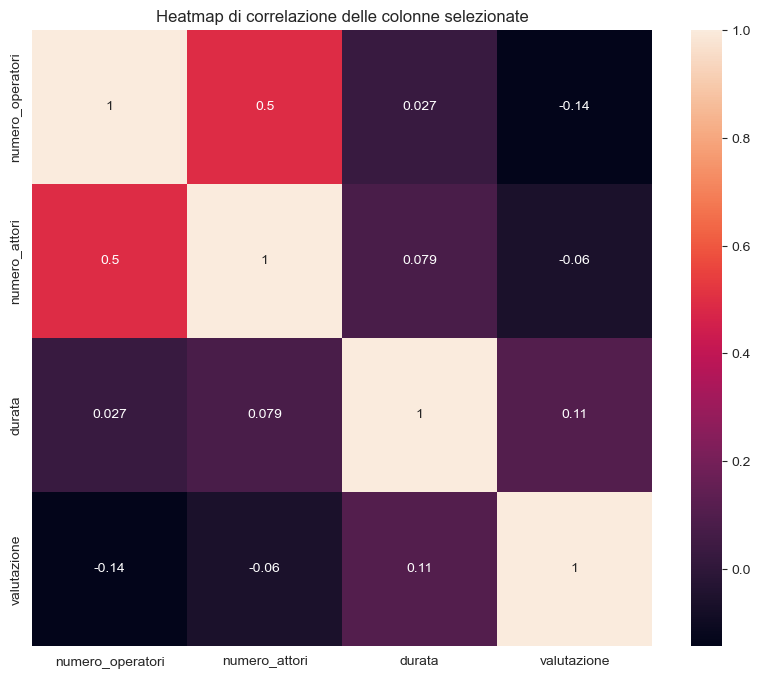

In [66]:
movies_to_merge = movies_df[['id', 'film_name', 'minute', 'rating']].copy()

crew_count = crew_df.groupby('id')['name'].count().reset_index(name = 'numero_operatori')
actors_count = actors_df.groupby('id')['name'].count().reset_index(name = 'numero_attori')

merged_df = pd.merge(movies_to_merge, crew_count, on='id')
merged_df = pd.merge(merged_df, actors_count, on='id')

merged_df.dropna(inplace=True)

merged_df.rename(columns = {'minute' : 'durata', 'rating' : 'valutazione'}, inplace = True)
merged_df = merged_df[['numero_operatori', 'numero_attori', 'durata', 'valutazione']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(merged_df, annot=True)
plt.title('Heatmap di correlazione delle colonne selezionate')
plt.show()

La matrice di correlazione mostra che non esistono relazioni forti tra la valutazione dei film e le altre variabili analizzate (numero di operatori, numero di attori, durata). L’unica correlazione moderata si osserva tra il numero di operatori e il numero di attori, suggerendo che i film con più personale tecnico tendono anche ad avere un cast più numeroso. Tuttavia, tali fattori non sembrano incidere in modo significativo sulla valutazione complessiva dei film.

### Quale paese ha vinto più oscar per miglior film in lingua straniera?

In [67]:
# Seleziono i vincitori di un Oscar per miglior film in lingua straniera
oscar_win_df = oscar_df.loc[
    (oscar_df['winner'] == True) & 
    (oscar_df['category'].isin(['FOREIGN LANGUAGE FILM']))].copy()

In [68]:
#Rinomino dei paesi 
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Union of Soviet Socialist Republics', 'Russia')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Federal Republic of Germany', 'Germany')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Italy; Dino De Laurentiis and Carlo Ponti, Producers', 'Italy')
oscar_win_df['person_country'] = oscar_win_df['person_country'].replace('Bosnia & Herzegovina', 'Bosnia and Herzegovina')

In [70]:
#Conto quante occorrenze ha ogni paese 
conteggi = oscar_win_df['person_country'].value_counts()

conteggi_df = conteggi.reset_index()
conteggi_df.columns = ['countries', 'count']  
conteggi_df

countries  count
0                    Italy     11
1                   France      9
2                   Russia      4
3                    Spain      4
4                  Germany      3
5                  Denmark      3
6          The Netherlands      3
7                   Sweden      3
8                  Austria      2
9              Switzerland      2
10               Argentina      2
11          Czechoslovakia      2
12                    Iran      2
13                 Hungary      2
14             Ivory Coast      1
15                   Chile      1
16                  Poland      1
17                   Japan      1
18  Bosnia and Herzegovina      1
19            South Africa      1
20                  Canada      1
21                  Taiwan      1
22          Czech Republic      1
23                 Algeria      1
24                  Mexico      1

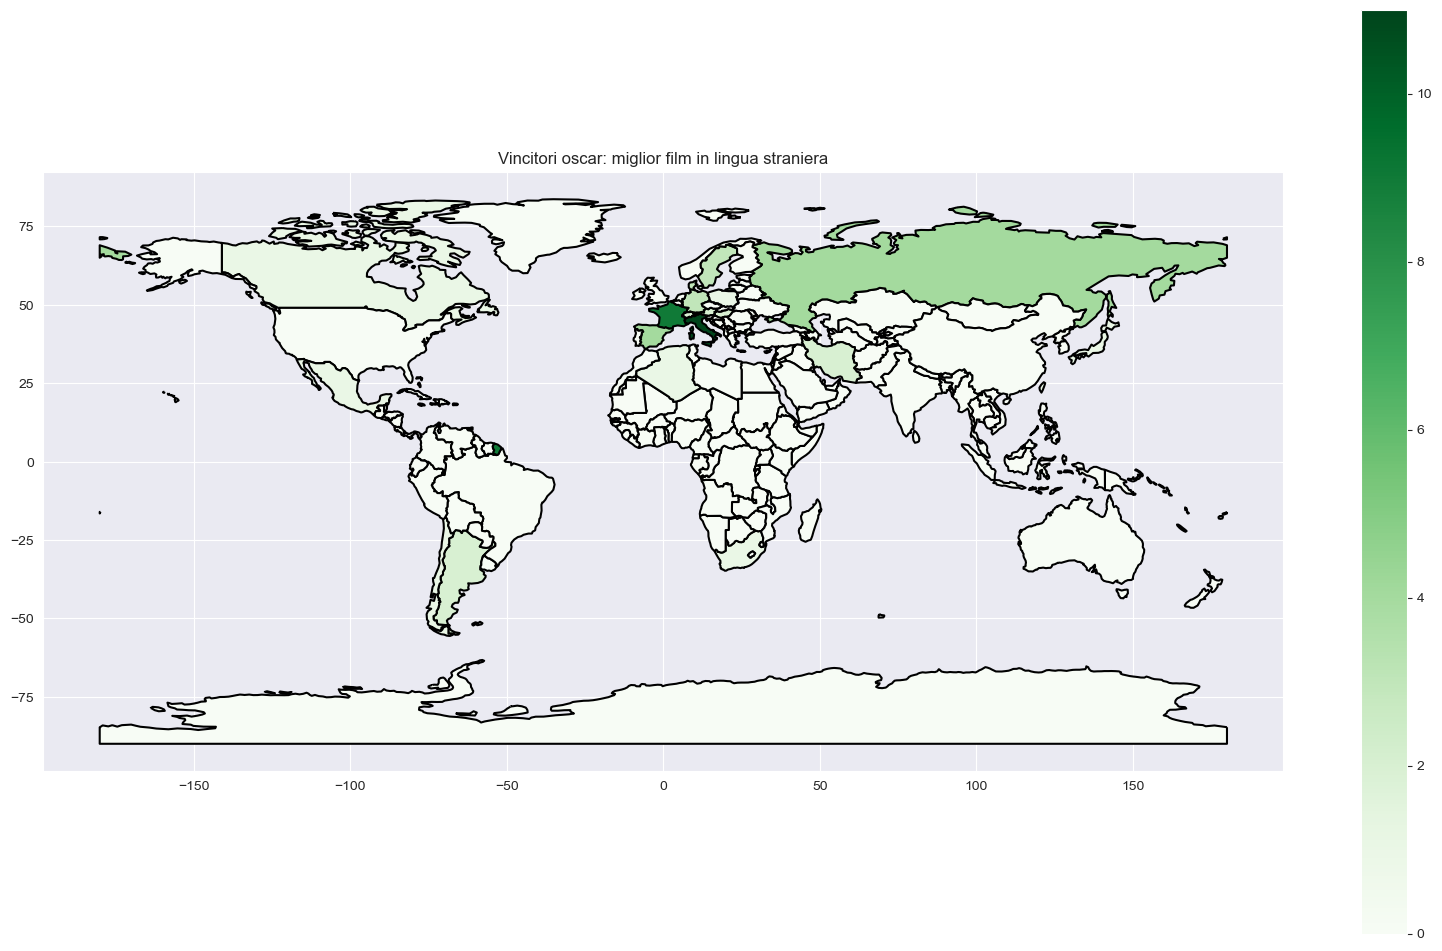

In [71]:
#Rappresento graficamente 
merged = world.merge(conteggi_df,how='left',left_on='NAME',right_on='countries')
merged['count']=merged['count'].fillna(0)

fig, ax = plt.subplots(1, 1, figsize=(20, 12))

cmap = 'Greens'  
vmin, vmax = merged['count'].min(), merged['count'].max()
norm = plt.Normalize(vmin=vmin, vmax=vmax)

merged.plot(column='count', ax=ax, cmap=cmap, norm=norm, legend=True,
            edgecolor='black', linewidth=1.5)
plt.title('Vincitori oscar: miglior film in lingua straniera')
plt.show()

Dal grafico emerge chiaramente che l’Italia è il paese che ha ottenuto più vittorie nella categoria "Miglior film in lingua straniera" agli Oscar, seguita da altre nazioni europee come Francia e Spagna. Questo dato riflette la forte tradizione cinematografica europea, in particolare italiana, riconosciuta a livello globale. La distribuzione geografica evidenzia inoltre un divario tra i paesi occidentali e molte nazioni dell’Africa e dell’Asia, che risultano assenti tra i vincitori, probabilmente a causa di minore visibilità o opportunità nel circuito cinematografico internazionale.

### Chi ha prodotto più film?

In [72]:
movies_per_year_df = movies_df[['id', 'film_date']].copy()
movies_per_year_df.dropna(axis=0,inplace=True)

new_country_df = countries_df.copy()
new_country_df.dropna(axis=0,inplace=True)

In [73]:
movies_per_year_df = pd.merge(movies_per_year_df,new_country_df,on='id',how='left')
movies_per_year_df.head()

id  film_date      country
0  1000001     2023.0           UK
1  1000001     2023.0          USA
2  1000002     2019.0  South Korea
3  1000003     2022.0          USA
4  1000004     1999.0      Germany

In [74]:
movies_per_year_df.isnull().sum()

id              0
film_date       0
country      3244
dtype: int64

In [75]:
movies_per_year_df.dropna(axis=0,inplace=True)
movies_per_year_df.isnull().sum()

id           0
film_date    0
country      0
dtype: int64

In [76]:
print(movies_per_year_df.duplicated().sum())

0


In [77]:
movies_per_year_df['country'] = movies_per_year_df['country'].replace('State of Palestine','Palestine')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('USSR','Russia')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Democratic Republic of Congo','Dem. Rep. Congo')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Russian Federation','Russia')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Central African Republic','Central African rep.')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('South Sudan','S. Sudan')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('Bolivarian Republic of Venezuela','Venezuela')
movies_per_year_df['country'] = movies_per_year_df['country'].replace('UK','United Kingdom')
all_countries = movies_per_year_df['country'].unique().tolist()

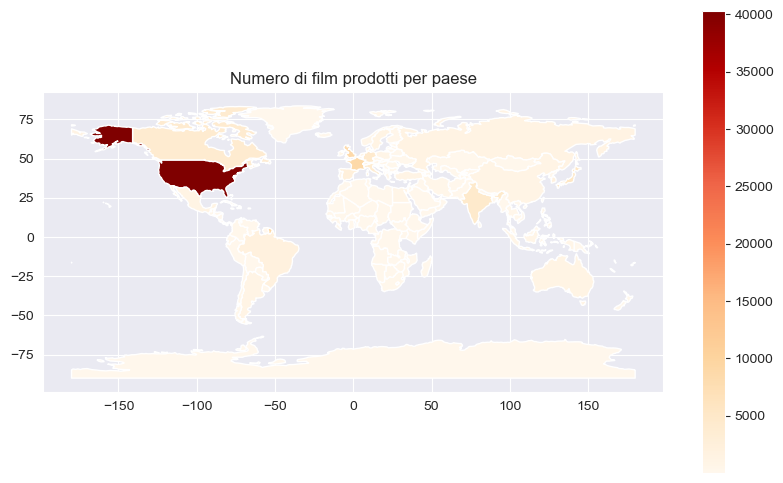

In [78]:
country_count = movies_per_year_df['country'].value_counts().reset_index()
country_count.columns = ['country','film_count']

country_count['country']= country_count['country'].replace('USA', 'United States of America')
merged = world.merge(country_count, left_on='NAME', right_on='country', how='left')
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column='film_count', cmap='OrRd', legend=True, ax=ax)
ax.set_title('Numero di film prodotti per paese')
countries_world = world['NAME'].unique().tolist()
set_countries_world = set(countries_world)
set_all_countries= set(all_countries)
countries_not_in_reference = set_all_countries - set_countries_world
countries_not_in_reference = list(countries_not_in_reference)

plt.show()

Dal grafico emerge chiaramente che gli Stati Uniti sono il paese con il maggior numero di film prodotti. Questo dato conferma la posizione dominante dell’industria cinematografica statunitense a livello globale, trainata soprattutto da Hollywood. Rispetto agli altri paesi, la produzione statunitense si distingue per quantità e costanza nel tempo, contribuendo significativamente alla diffusione del cinema a livello internazionale.

### Come vengono maggiormente trasmessi i film, nei vari paesi?

In [36]:
#Rinomino dei paesi
releases_df['countries'] = releases_df['countries'].replace('Democratic Republic of Congo', 'Dem. Rep. Congo')
releases_df['countries'] = releases_df['countries'].replace('USSR', 'Russia')
releases_df['countries'] = releases_df['countries'].replace('UK', 'United Kingdom')
releases_df['countries'] = releases_df['countries'].replace('USA', 'United States of America')
releases_df['countries'] = releases_df['countries'].replace('United State of America', 'United States of America')
releases_df['countries'] = releases_df['countries'].replace('Bolivarian Republic of Venezuela', 'Venezuela')

In [37]:
#Creo dei sottogruppi divisi per paese e ne ritorno la type maggiore per ognuno di essi
type_country_df = releases_df.groupby('countries')['type'].agg(pd.Series.mode).reset_index()

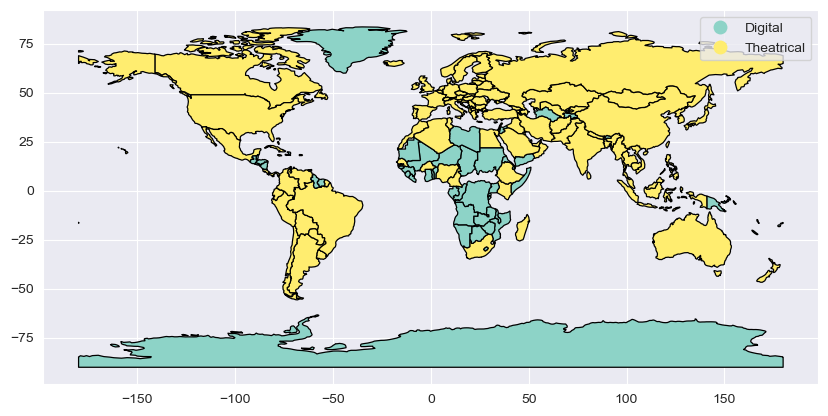

In [38]:
#Rappresento graficamente
merged = world.merge(type_country_df,how='inner',left_on='NAME',right_on='countries')

fig, ax = plt.subplots(figsize=(10, 16)) 

merged.plot(ax=ax,  edgecolor='black', linewidth=0.9, column='type', legend=True, cmap='Set3')
plt.show()

Analizzando il grafico relativo alla distribuzione dei film a livello globale, è possibile osservare una distinzione significativa tra i formati digitali e theatrical.
In particolare, il formato digitale risulta essere predominante nei paesi più sviluppati, dove l’accesso a tecnologie avanzate, infrastrutture digitali e connessioni internet ad alta velocità consente una fruizione agevole dei contenuti cinematografici attraverso piattaforme online.
Al contrario, nei paesi meno sviluppati emerge una maggiore diffusione della distribuzione theatrical, ovvero la visione dei film nelle sale cinematografiche tradizionali. Questo può essere attribuito a diversi fattori, tra cui la limitata disponibilità di dispositivi digitali personali, la scarsa diffusione della banda larga e un diverso modello di consumo culturale.
In sintesi, il grafico evidenzia come il grado di sviluppo tecnologico ed economico influenzi in modo diretto le modalità con cui i film vengono distribuiti e fruiti nei vari contesti geografici.
